In [216]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle

Populating the interactive namespace from numpy and matplotlib


In [217]:
np.set_printoptions(precision=10) # Set precision

# Define a function with allowed ending positions given current position

def allowed(current):
    return {
        0: [4,6],
        1: [6,8],
        2: [7,9],
        3: [4,8],
        4: [0,3,9],
        5: [],
        6: [0,1,7],
        7: [2,6],
        8: [1,3],
        9: [2,4],
    }[current]

In [218]:
# Define a function that starting at 0, randomly moves T times as a knight

def moves(T,starting=0):
    cnts = 0
    current = starting
    sum_track = 0
    while cnts < T:
        #print 'current: ', current
        new_position = random.choice(allowed(current),1)
        #print 'new: ', new_position
        sum_track += new_position[0]
        current = new_position[0]
        cnts += 1
    return sum_track
    

(array([   10.,    90.,   414.,  1341.,  2512.,  2847.,  1875.,   743.,
          154.,    14.]),
 array([ 238. ,  290.4,  342.8,  395.2,  447.6,  500. ,  552.4,  604.8,
         657.2,  709.6,  762. ]),
 <a list of 10 Patch objects>)

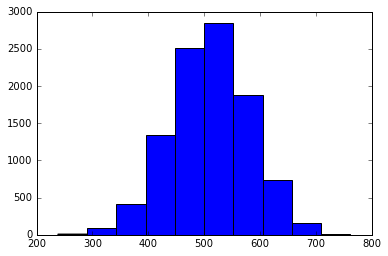

In [219]:
# Now run this many times and get the distribution of the sum

T = 1024 # Number of moves
n_samples = 10000   # Number of realisations
mod_value = 1024

distr_sum = []
for i in arange(n_samples):
    distr_sum.append(moves(T))
    
modulo = np.array(mod(distr_sum,mod_value))   # This array contains the distribution of results under the modulo operation (10)
    
plt.hist(modulo)

In [220]:
# In this case the expected value equals the mean of the distribution
# (in general, however, it equals the sum of the product of each sampled value
# times its probability of occuring).

np.set_printoptions(precision=10)
print "The expected value is: ", mean(modulo)

# And standard deviation
print "The standard deviation value is: ", std(modulo)
    

The expected value is:  510.5803
The standard deviation value is:  70.415695352


In [221]:
# Conditional probabilities

distr_sum = np.array(distr_sum)

# Impose the condition that sum is divisble by 29:
mod_value = 29
print np.array(mod(distr_sum,mod_value)) == 0
P = distr_sum[np.array(mod(distr_sum,mod_value)) == 0]
P = np.array(P)

# The conditional probability is obtained as the number of elements of the new
# conditioned distribution called P that are divisible by 23, diveded by the size of P.

P_cond = float(len(P[np.array(mod(P,23)) == 0]))/float(len(P))

print "After T=1024 moves, the probability that the sum S is divisible by 23, given that it is divisible by 29 is: ", P_cond

[False False False ..., False False False]
After T=1024 moves, the probability that the sum S is divisible by 23, given that it is divisible by 29 is:  0.10985915493
